In [0]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import numpy as np

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import GradientBoostingClassifier

In [0]:
def render(clf, ax, X_train, X_test, y_train, y_test):
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])

  h=0.02
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

  if hasattr(clf, 'predict_proba'):
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
  else: 
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

  ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
  ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')

In [0]:
dataset = make_moons(noise=0.2, random_state=0)

In [0]:
# preprocess dataset, split into training and test part
X, y = dataset
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

In [106]:
#clf = KNeighborsClassifier(3)
#clf.fit(X_train, y_train)

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

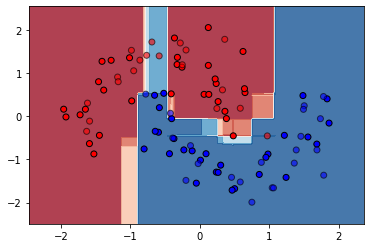

In [108]:
render(clf, plt, X_train, X_test, y_train, y_test)

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0


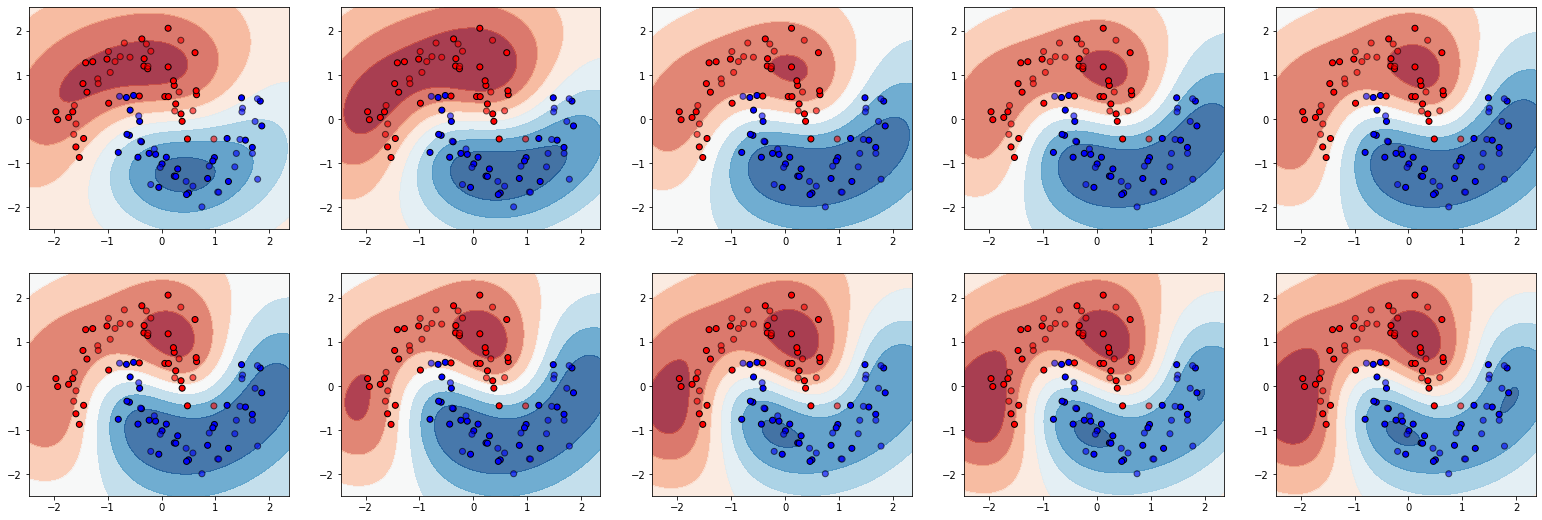

In [121]:
plt.figure(figsize=(27, 9))
for i in range(1, 11):
  C = i / 10
  print(C)
  clf = SVC(C=C)
  clf.fit(X_train, y_train)
  ax = plt.subplot(2, 5, i)
  render(clf, ax, X_train, X_test, y_train, y_test)